# Introduction to Descriptive and Predictive Models

This module introduces the core ideas of *machine learning*, which is subdivided into **unsupervised** and **supervised** machine learning.

We break it into three segments:

1. Representing data for building machine learning models.
2. Unsupervised machine learning.
3. Supervised machine learning.

# 3. Supervised Machine Learning

We'll next consider linear regression and logistic regression. 

In [1]:
from sklearn.datasets import load_wine

dataset = load_wine()
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [2]:
import pandas as pd
# Here is the table as a dataframe
pd.DataFrame(dataset.data,columns=dataset.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
# These are the y vector -- the target class (0, 1, 2)
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [0]:
from sklearn.model_selection import train_test_split
import sklearn.metrics

X_train, X_test, y_train, y_test = train_test_split(dataset.data, \
                                                    dataset.target, \
                                                    test_size=0.30)


## 3.2 Linear Regression

Let's start with a simple scatter plot of points where we should be able to find the regression line...

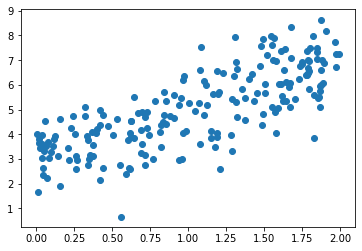

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Let's plot a series of points
X = 2 * np.random.rand(200, 1)

# We are plotting y = 2x + 3 plus a random
# value 
y = 2 * X + 3 + np.random.randn(200, 1)

plt.scatter(X,y)

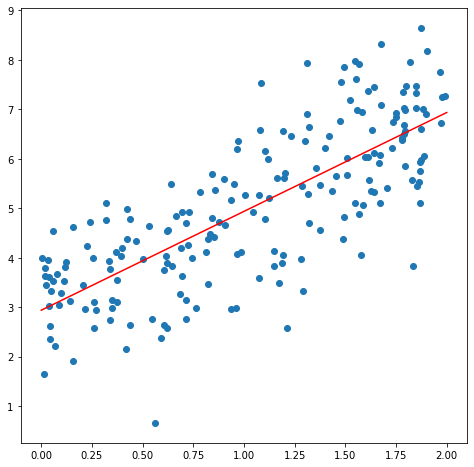

[[1.99821214]] [2.93892195]


In [6]:
from sklearn.linear_model import LinearRegression

# Use regression to get slope + intercept for
# a line matching the points
rgr = LinearRegression()
rgr.fit(X, y)

# Let's plot it
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X, y)

# The line will be from 0 -> 3 non-inclusive
X2 = range(0,3)
y2 = rgr.coef_*X2 + rgr.intercept_
ax.plot(X2, y2.T, color='red')
plt.show()

print (rgr.coef_, rgr.intercept_)

How well do the above coefficient + intercept match our original $y = 2x + 3 + random$ equation?

## 3.3 Logistic Regression

Logistic regression uses techniques from linear regression but tries to map to Boolean values.

### 3.3.1 The Logistic Function

Let's look at the **logit** or **logistic** function, also called the **sigmoid** function and indicated by $\sigma$, which is "near linear" but flattens at 0 and 1.  Let's look at several variations, also vs a linear and step function...

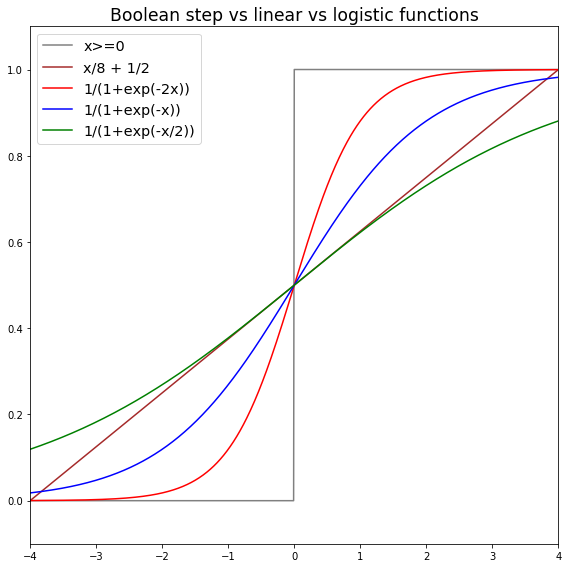

In [7]:
X = [x * 0.01 for x in range(-400,400)]

def logit_1(x):
  return 1 / (1 + np.exp(-2*x))

def logit_2(x):
  return 1 / (1 + np.exp(-x))

def logit_3(x):
  return 1 / (1 + np.exp(-(x * 0.5)))


# Let's plot it
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(X, [1 if x >= 0 else 0 for x in X], color='gray', label='x>=0')
ax.plot(X, [x/8+0.5 for x in X], color='brown', label='x/8 + 1/2')
ax.plot(X, [logit_1(x) for x in X], color='red', label='1/(1+exp(-2x))')
ax.plot(X, [logit_2(x) for x in X], color='blue', label='1/(1+exp(-x))')
ax.plot(X, [logit_3(x) for x in X], color='green', label='1/(1+exp(-x/2))')
ax.set_title('Boolean step vs linear vs logistic functions',fontsize='xx-large')
ax.set_xlim(-4, 4)
ax.set_ylim(-0.1, 1.1)
ax.legend(fontsize='x-large')
plt.tight_layout()

plt.show()


### 3.3.2 Using Logistic Regression

We can easily use a logistic regression classifier from SciKit to train and make predictions.

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(prediction,y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

Accuracy: 88.9%


In [9]:
print(clf.coef_, clf.intercept_)

[[ 0.42563018  0.32195167  0.25886683  0.0543419   0.03734676  0.51970329
   0.66477301 -0.03746831  0.12861236  0.17787641  0.09315516  0.66857591
   0.01945065]
 [-0.53687975 -0.70742913 -0.2577241  -0.06811327 -0.04644551 -0.0931486
   0.32657432  0.03139836  0.17684203 -1.0420618   0.17406823  0.07207803
  -0.01101007]
 [ 0.11124957  0.38547746 -0.00114273  0.01377138  0.00909876 -0.42655469
  -0.99134732  0.00606996 -0.30545439  0.86418539 -0.26722339 -0.74065394
  -0.00844058]] [-31.83634795  27.46240572   4.37394222]
